# Guia do funcionamento da Simulação do Blind Quantum Computing
##### O documento tem o objetivo de demostrar o funcionamento da simulação dos protocolos Childs e BFK no BQC.
#### IMPORTANDO AS DEPENDÊNCIAS


In [1]:
import random
from quantumnet.components import Network, Host
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger

##### É inicializada a rede, com uma topologia de grade, que apresenta 1 servidor (nó verde) e 8 clientes (nós vermelhos).

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


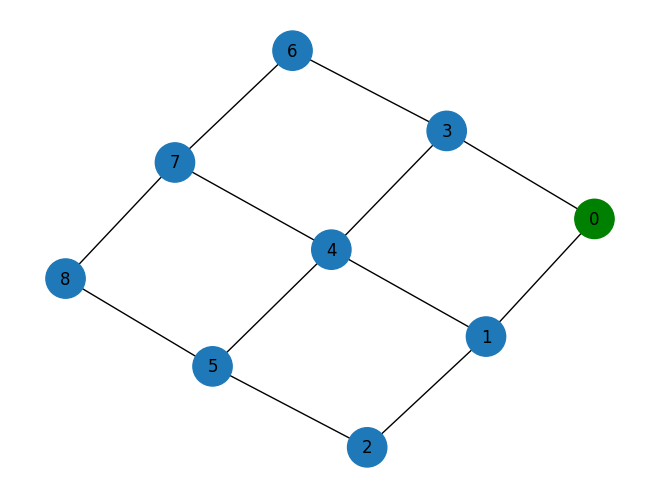

In [2]:
rede = Network()
rede.set_ready_topology('grade',8,3,3)  # Exemplo de uma grade 3x3 com  clientes e 1 servidor
rede.draw()
Logger.activate(Logger)

##### A realização da simulação de uma requesição acontece de forma em que vamos passar uma função para a geração de um circuito aleatório com o número de qubits e número de portas passados como parâmetros e a escolha de um protocolo para executar esse circuito. Além de haver o parâmetro "scenario", que pode ser 1 ou 2, respectivamente, para o cenário normal e cenário da proposta. O protocolo escolhido foi o AC_BQC, Childs, e o cliente é (alice_id).

In [4]:
quantum_circuit, num_qubits, circuit_depth = rede.generate_random_circuit(num_qubits=20, num_gates=20)
rede.application_layer.run_app("AC_BQC", alice_id=6, bob_id=0, num_qubits=10,scenario=1,circuit_depth=circuit_depth)

2025-01-06 16:31:13,007: Circuito aleatório gerado com 20 qubits e 20 portas. Instruções sobre o circuito.
2025-01-06 16:31:13,008: Instrução: {'operation': 'x', 'qubits': [4]}
2025-01-06 16:31:13,008: Instrução: {'operation': 'x', 'qubits': [10]}
2025-01-06 16:31:13,009: Instrução: {'operation': 'z', 'qubits': [7]}
2025-01-06 16:31:13,009: Instrução: {'operation': 'h', 'qubits': [17]}
2025-01-06 16:31:13,010: Instrução: {'operation': 'x', 'qubits': [5]}
2025-01-06 16:31:13,010: Instrução: {'operation': 'swap', 'qubits': [17, 14]}
2025-01-06 16:31:13,011: Instrução: {'operation': 'cx', 'qubits': [7, 18]}
2025-01-06 16:31:13,012: Instrução: {'operation': 'cx', 'qubits': [7, 2]}
2025-01-06 16:31:13,012: Instrução: {'operation': 'cz', 'qubits': [18, 17]}
2025-01-06 16:31:13,012: Instrução: {'operation': 'swap', 'qubits': [14, 16]}
2025-01-06 16:31:13,013: Instrução: {'operation': 'cz', 'qubits': [13, 18]}
2025-01-06 16:31:13,013: Instrução: {'operation': 'cz', 'qubits': [17, 2]}
2025-01-0

                                                  
 q_0: ────────────────────────────────────────────
                                                  
 q_1: ─────────────────────────────────■──────────
                     ┌───┐      ┌───┐  │          
 q_2: ───────────────┤ X ├────■─┤ Y ├──┼──────────
                     └─┬─┘    │ └───┘  │          
 q_3: ─────────────────┼──────┼────────┼──────────
      ┌───┐            │      │        │          
 q_4: ┤ X ├────────────┼──────┼────────┼──────────
      ├───┤┌───┐       │      │        │          
 q_5: ┤ X ├┤ T ├───────┼──────┼────────┼──────────
      ├───┤└───┘       │      │        │          
 q_6: ┤ H ├────────────┼──────┼────────┼──────────
      ├───┤            │      │        │          
 q_7: ┤ Z ├───────■────■──────┼────────┼──────────
      └───┘       │           │        │          
 q_8: ────────────┼───────────┼────────┼──────────
                  │           │        │          
 q_9: ────────────┼───────────┼

2025-01-06 16:31:13,096: Timeslot 14: Servidor aplicando operações nos qubits.
2025-01-06 16:31:13,097: Timeslot 15: Servidor aplicando operações nos qubits.
2025-01-06 16:31:13,097: Timeslot 16: Servidor aplicando operações nos qubits.
2025-01-06 16:31:13,098: Timeslot 17: Servidor aplicando operações nos qubits.
2025-01-06 16:31:13,100: Timeslot 18: Servidor aplicando operações nos qubits.
2025-01-06 16:31:13,100: Servidor aplicou as operações instruídas pelo Cliente nos qubits.
2025-01-06 16:31:13,100: Qubit 959 após operações de Servidor - Estado: 1, Fase: -1
2025-01-06 16:31:13,101: Qubit 177 após operações de Servidor - Estado: 1, Fase: -1
2025-01-06 16:31:13,101: Qubit 511 após operações de Servidor - Estado: 1, Fase: 1
2025-01-06 16:31:13,102: Qubit 528 após operações de Servidor - Estado: 1, Fase: 1
2025-01-06 16:31:13,102: Qubit 488 após operações de Servidor - Estado: 1, Fase: -1
2025-01-06 16:31:13,103: Qubit 498 após operações de Servidor - Estado: 1, Fase: -1
2025-01-06 1

##### Nessa função, pode-se coletar a métrica da média da fidelidade dos pares EPRs utilizados na requesição.

In [5]:
rede.application_layer.avg_fidelity_on_applicationlayer()

A média das fidelidades das rotas é: 0.9563


0.9562859120339086

##### Além de haver uma função para mostrar as fidelidades das rotas.

In [6]:
rede.application_layer.print_route_fidelities()

Fidelidades das rotas utilizadas:
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137


##### Nesse caso, foi executado o protocolo BFK, com parâmetros como 20 qubits e 20 portas. Além da escolha de um nó como cliente=alice_id.

In [7]:
quantum_circuit, num_qubits, circuit_depth = rede.generate_random_circuit(num_qubits=20, num_gates=20)
rede.application_layer.run_app("BFK_BQC", alice_id=2, bob_id=0, num_qubits=num_qubits,scenario=1,circuit_depth= circuit_depth)

2025-01-06 16:31:13,470: Circuito aleatório gerado com 20 qubits e 20 portas. Instruções sobre o circuito.
2025-01-06 16:31:13,471: Instrução: {'operation': 'cz', 'qubits': [12, 3]}
2025-01-06 16:31:13,472: Instrução: {'operation': 'h', 'qubits': [4]}
2025-01-06 16:31:13,472: Instrução: {'operation': 's', 'qubits': [14]}
2025-01-06 16:31:13,473: Instrução: {'operation': 'cx', 'qubits': [9, 10]}
2025-01-06 16:31:13,473: Instrução: {'operation': 't', 'qubits': [11]}
2025-01-06 16:31:13,473: Instrução: {'operation': 'cx', 'qubits': [16, 2]}
2025-01-06 16:31:13,474: Instrução: {'operation': 's', 'qubits': [1]}
2025-01-06 16:31:13,474: Instrução: {'operation': 'swap', 'qubits': [8, 13]}
2025-01-06 16:31:13,475: Instrução: {'operation': 'cz', 'qubits': [16, 18]}
2025-01-06 16:31:13,475: Instrução: {'operation': 'cx', 'qubits': [7, 19]}
2025-01-06 16:31:13,476: Instrução: {'operation': 'swap', 'qubits': [0, 16]}
2025-01-06 16:31:13,476: Instrução: {'operation': 'z', 'qubits': [13]}
2025-01-06

                                           
 q_0: ─────────────────────────────X──X──X─
              ┌───┐                │  │  │ 
 q_1: ────────┤ S ├────────────────┼──┼──┼─
              ├───┤┌───┐           │  │  │ 
 q_2: ────────┤ X ├┤ X ├───────────┼──┼──┼─
              └─┬─┘└───┘           │  │  │ 
 q_3: ─■────────┼──────────────────┼──┼──┼─
       │ ┌───┐  │                  │  │  │ 
 q_4: ─┼─┤ H ├──┼──────────────────┼──┼──┼─
       │ └───┘  │                  │  │  │ 
 q_5: ─┼────────┼──────────────────┼──┼──┼─
       │        │                  │  │  │ 
 q_6: ─┼────────┼──────────────────┼──┼──┼─
       │        │            ┌───┐ │  │  │ 
 q_7: ─┼────────┼─────────■──┤ T ├─┼──┼──┼─
       │        │         │  ├───┤ │  │  │ 
 q_8: ─┼────────┼────X────┼──┤ T ├─┼──┼──┼─
       │        │    │    │  └───┘ │  │  │ 
 q_9: ─┼───■────┼────┼────┼────────┼──┼──┼─
       │ ┌─┴─┐  │    │    │        │  │  │ 
q_10: ─┼─┤ X ├──┼────┼────┼────────┼──┼──┼─
       │ ├───┤  │    │    │     

2025-01-06 16:31:13,489: Qubit 348 preparado pelo cliente 2.
2025-01-06 16:31:13,490: Qubit 171 preparado pelo cliente 2.
2025-01-06 16:31:13,490: Qubit 965 preparado pelo cliente 2.
2025-01-06 16:31:13,491: Qubit 208 preparado pelo cliente 2.
2025-01-06 16:31:13,491: Qubit 65 preparado pelo cliente 2.
2025-01-06 16:31:13,492: Qubit 895 preparado pelo cliente 2.
2025-01-06 16:31:13,493: Qubit 914 preparado pelo cliente 2.
2025-01-06 16:31:13,494: Qubit 707 preparado pelo cliente 2.
2025-01-06 16:31:13,494: Qubit 96 preparado pelo cliente 2.
2025-01-06 16:31:13,494: Qubit 182 preparado pelo cliente 2.
2025-01-06 16:31:13,495: Qubit 250 preparado pelo cliente 2.
2025-01-06 16:31:13,495: Qubit 332 preparado pelo cliente 2.
2025-01-06 16:31:13,496: Qubit 975 preparado pelo cliente 2.
2025-01-06 16:31:13,496: Qubit 800 preparado pelo cliente 2.
2025-01-06 16:31:13,496: Qubit 41 preparado pelo cliente 2.
2025-01-06 16:31:13,497: Calculando rota padrão para o transporte.
2025-01-06 16:31:13,4

##### Nessa função, podemos coletar a métrica da média da fidelidade dos pares EPRs utilizados nas duas requesições.

In [8]:
rede.application_layer.avg_fidelity_on_applicationlayer()

A média das fidelidades das rotas é: 0.9363


0.9362575347659328

##### Além de printar as fidelidades das rotas.

In [9]:
rede.application_layer.print_route_fidelities()

Fidelidades das rotas utilizadas:
1.0000
0.9900
0.9801
0.9704
0.9607
0.9511
0.9416
0.9322
0.9229
0.9137
0.9187
0.9099
0.9463
0.9653
0.8957
0.9071
0.8750
0.9275
0.9316
0.9389
0.8986
0.9201


##### Pode ser coletado os EPRs utilizados na camada de aplicação, consequentemente nas requesições e protocolos.

In [ ]:
rede.get_total_useds_eprs()

2025-01-06 16:31:13,791: Eprs usados na camada LinkLayer: 0
2025-01-06 16:31:13,792: Eprs usados na camada NetworkLayer: 0
2025-01-06 16:31:13,792: Eprs usados na camada ApplicationLayer: 48


48